In [1]:
import numpy as np
# Plotting libraries
import matplotlib.pylab as plt
# Magic function to make matplotlib inline; other style specs must come AFTER
%matplotlib inline
# This enables high resolution PNGs.
%config InlineBackend.figure_formats = {'png', 'svg'}

In [2]:
from egttools.analytical import replicator_equation
from egttools.utils import find_saddle_type_and_gradient_direction
from egttools.plotting import plot_gradient

In [97]:
nb_points = 101
strategy_RM = np.linspace(0, 1, num=nb_points, dtype=np.float64)
W = np.linspace(0, 1, num=nb_points, dtype=np.float64)
strategy_AD = 1 - strategy_i
states = np.array((strategy_RM,strategy_AD)).T


# Payoff matrix
F = 3.5
M = 4
N = 5
c=2
R=(1-0.3)**-1
A = np.array([
        [((((M*c)*R)*F)/N)-c*R, ((((M*c)*R)*F)/N)-c*R],
        [((((M*c)*R)*F)/N),((((M*c)*R)*F)/N)]
    ])
print(A)

def prisoner_payoff(T, F , P , S , M ,N):
    if(M < N/2):
        return np.array([
        [P,P],
        [P, P],
    ])
    else:
        return np.array([
                [(M/N) * R, (M/N) * S],
                [(M/N) * T, P],
    ])

[[5.14285714 5.14285714]
 [8.         8.        ]]


In [98]:
# Calculate gradient
G = np.array([replicator_equation(states[i], A)[0] for i in range(len(states))])

In [99]:
# Find saddle points (where the gradient is 0)
epsilon = 1e-7
saddle_points_idx = np.where((G <= epsilon) & (G >= -epsilon))[0]
saddle_points = saddle_points_idx / (nb_points - 1)

# Now let's find which saddle points are absorbing/stable and which aren't
# we also annotate the gradient's direction among saddle poinst
saddle_type, gradient_direction = find_saddle_type_and_gradient_direction(G, saddle_points_idx)

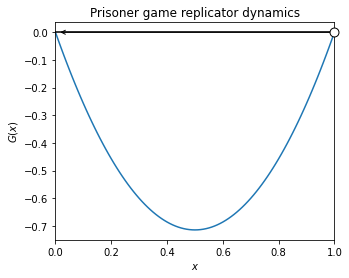

In [100]:
ax = plot_gradient(strategy_RM,
                   G,
                   saddle_points,
                   saddle_type,
                   gradient_direction,
                   'Prisoner game replicator dynamics',
                   xlabel='$x$')
plt.show()